In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, utils, models
from tensorflow.keras.datasets import mnist

In [ ]:
(xtrain,_), (xtest,_) = mnist.load_data()
xtrain.shape
xtrainS = xtrain.astype('float32') / 255.
xtestS = xtest.astype('float32') / 255.
xtrainS = np.reshape(xtrainS,(len(xtrainS),28,28,1))
xtestS = np.reshape(xtestS,(len(xtestS),28,28,1))

In [ ]:
nf = 0.5
xtrainN=xtrainS+nf*np.random.normal(loc=0.0,scale=1.0,size=xtrainS.shape)
xtestN=xtestS+nf*np.random.normal(loc=0.0,scale=1.0,size=xtestS.shape)
xtrainN = np.clip(xtrainN, 0., 1.)
xtestN = np.clip(xtestN, 0., 1.)

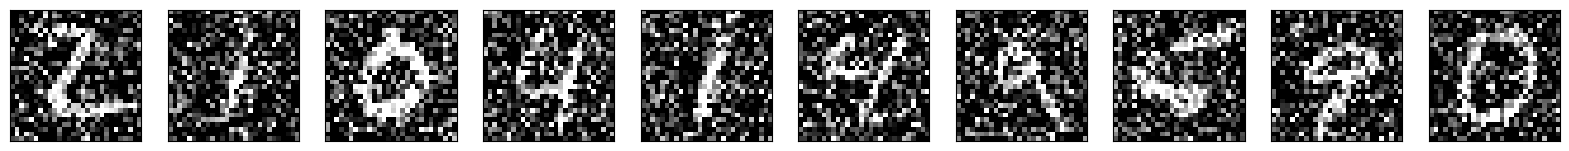

In [ ]:
n = 10
plt.figure(figsize=(20,2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(xtestN[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
inp_img=keras.Input(shape=(28,28,1))
x=layers.Conv2D(16,(3,3),activation='relu',padding='same')(inp_img)
x=layers.MaxPooling2D((2,2),padding='same')(x)
x=layers.Conv2D(8,(3,3),activation='relu',padding='same')(x)
x=layers.MaxPooling2D((2,2),padding='same')(x)
x=layers.Conv2D(8,(3,3),activation='relu',padding='same')(x)
encoder=layers.MaxPooling2D((2,2),padding='same')(x)
x=layers.Conv2D(8,(3,3),activation='relu',padding='same')(encoder)
x=layers.UpSampling2D((2,2))(x)
x=layers.Conv2D(8,(3,3),activation='relu',padding='same')(x)
x=layers.UpSampling2D((2,2))(x)
x=layers.Conv2D(16,(3,3),activation='relu')(x)
x=layers.UpSampling2D((2,2))(x)
decoder=layers.Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)
model=keras.Model(inp_img,decoder)
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 14, 14, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 7, 7, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_10 (UpSampling2D)      │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_11 (UpSampling2D)      │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_12 (UpSampling2D)      │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(xtrainN,xtrainS,epochs=2,batch_size=128,shuffle=True,validation_data=(xtestN,xtestS))

Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 71s 145ms/step - loss: 0.1593 - val_loss: 0.1501
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 143ms/step - loss: 0.1491 - val_loss: 0.1423


Text(0.5, 1.0, 'Training Loss vs. Validation Loss\nJEEVAGOWTHAM S - 212222230053')

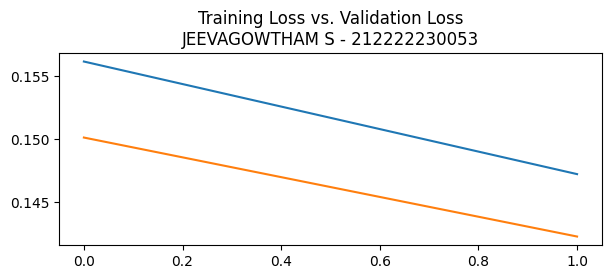

In [ ]:
metrics=pd.DataFrame(model.history.history)
plt.figure(figsize=(7,2.5))
plt.plot(metrics['loss'], label='Training Loss')
plt.plot(metrics['val_loss'], label='Validation Loss')
plt.title('Training Loss vs. Validation Loss\nJEEVAGOWTHAM S - 212222230053')

In [ ]:
decodeimg=model.predict(xtestN)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


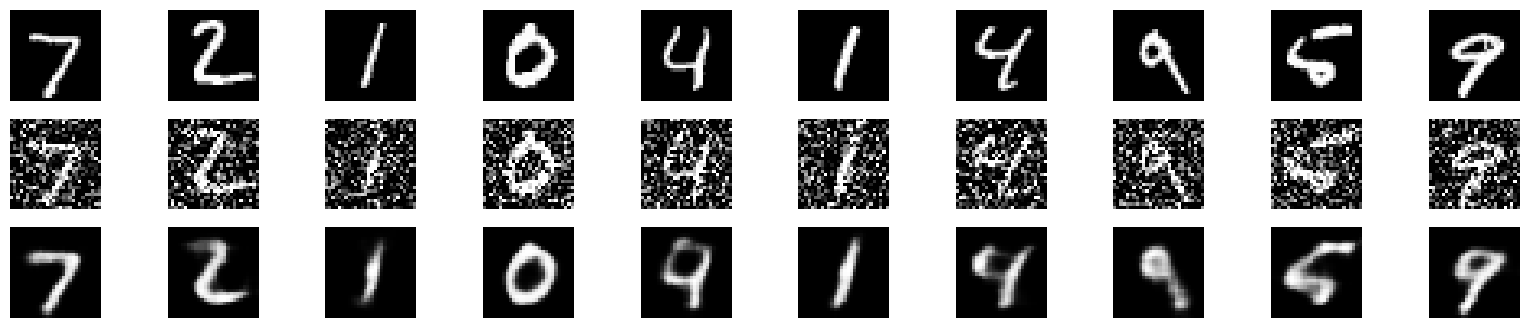

In [ ]:
def display_images(xtestS, xtestN, decodeimg, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        for j, img in enumerate([xtestS,xtestN,decodeimg]):
            ax = plt.subplot(3, n, i + 1 + j * n)
            plt.imshow(img[i].reshape(28, 28), cmap='gray')
            ax.axis('off')
    plt.show()
display_images(xtestS, xtestN, decodeimg)